<a href="https://colab.research.google.com/github/ruddypp/uas-machinelearning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Rudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
#Mengunggah dataset hasil clustering
from google.colab import files
uploaded = files.upload()

nama_file = list(uploaded.keys())[0]
data_klaster = pd.read_csv(nama_file)
print("Dataset Hasil Clustering:")
print(data_klaster.head())


Saving hasil_clustering.csv to hasil_clustering (1).csv
Dataset Hasil Clustering:
   Formatted Date  Summary  Precip Type  Temperature (C)  \
0            2159       19            0        -0.257599   
1            2160       19            0        -0.269814   
2            2161       17            0        -0.267487   
3            2162       19            0        -0.381489   
4            2163       17            0        -0.332631   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                 -0.324035  0.793470           0.478635   
1                 -0.339097  0.639996           0.499594   
2                 -0.138102  0.793470          -0.995473   
3                 -0.459071  0.486521           0.476306   
4                 -0.362469  0.486521           0.033841   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                0.591256         1.306976         0.0              0.101685   
1                0.665756         1.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:


# mengecek data di dalam kolom
print(data_klaster.columns)

# membuat 'klaster' karena didalam dataset tertulis klaster
X = data_klaster.drop(columns=['Klaster'])  # Fitur
y = data_klaster['Klaster']  # Label

#Membagi dataset menjadi fitur dan label, kemudian membaginya menjadi data latih dan data uji
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data latih: {X_latih.shape[0]}, Jumlah data uji: {X_uji.shape[0]}")

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Klaster', 'PCA1', 'PCA2'],
      dtype='object')
Jumlah data latih: 77162, Jumlah data uji: 19291


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Menggunakan Random Forest sebagai algoritma klasifikasi
model = RandomForestClassifier(random_state=42)
model.fit(X_latih, y_latih)

print("Model Random Forest telah dilatih.")

# Random Forest dipilih karena merupakan metode ensemble yang efektif untuk menangani dataset dengan banyak fitur.


Model Random Forest telah dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi: 0.9999481623555025
F1-Score: 0.9999481623107859


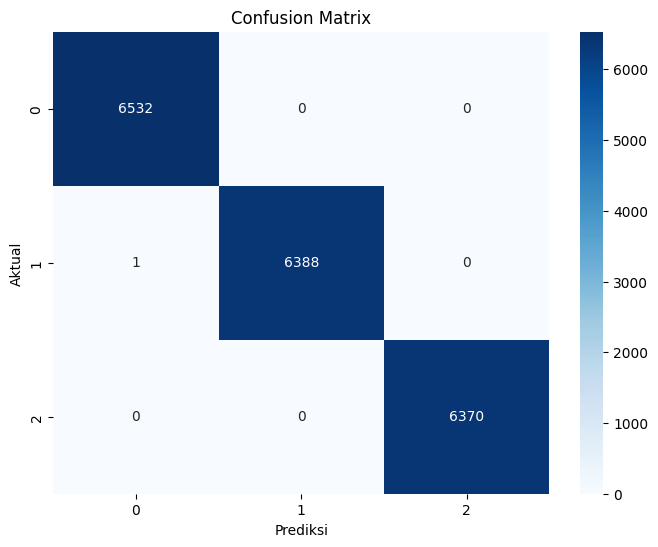

In [ ]:
# Prediksi pada data uji
y_prediksi = model.predict(X_uji)

# Menghitung metrik evaluasi
akurasi = accuracy_score(y_uji, y_prediksi)
f1 = f1_score(y_uji, y_prediksi, average='weighted')

print(f"Akurasi: {akurasi}")
print(f"F1-Score: {f1}")

# Membangun Confusion Matrix
conf_matrix = confusion_matrix(y_uji, y_prediksi)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Tuning model menggunakan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_latih, y_latih)

print("Hyperparameter terbaik:")
print(grid_search.best_params_)


Hyperparameter terbaik:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Evaluasi model setelah tuning
model_terbaik = grid_search.best_estimator_
y_pred_tuned = model_terbaik.predict(X_uji)

akurasi_tuned = accuracy_score(y_uji, y_pred_tuned)
f1_tuned = f1_score(y_uji, y_pred_tuned, average='weighted')

print(f"Akurasi setelah tuning: {akurasi_tuned}")
print(f"F1-Score setelah tuning: {f1_tuned}")


Akurasi setelah tuning: 0.9999481623555025
F1-Score setelah tuning: 0.9999481623107859


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [ ]:
# Menampilkan hasil analisis dan evaluasi model klasifikasi
print("\nLaporan Klasifikasi Sebelum Tuning:")
print(classification_report(y_uji, y_prediksi))

print("\nLaporan Klasifikasi Setelah Tuning:")
print(classification_report(y_uji, y_pred_tuned))


Laporan Klasifikasi Sebelum Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6532
           1       1.00      1.00      1.00      6389
           2       1.00      1.00      1.00      6370

    accuracy                           1.00     19291
   macro avg       1.00      1.00      1.00     19291
weighted avg       1.00      1.00      1.00     19291


Laporan Klasifikasi Setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6532
           1       1.00      1.00      1.00      6389
           2       1.00      1.00      1.00      6370

    accuracy                           1.00     19291
   macro avg       1.00      1.00      1.00     19291
weighted avg       1.00      1.00      1.00     19291



Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.